# Libraries

In [1]:
import numpy as np # numerical computation
import pandas as pd # dataset manipulation
pd.set_option('display.max_columns', None)

# Visualization tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling packages
import sklearn
import xgboost

In [2]:
print('Numpy ver:', np.__version__)
print('Pandas ver:', pd.__version__)
print('Matplotlib ver:', matplotlib.__version__)
print('Seaborn ver:', sns.__version__)
print('Sklearn ver:', sklearn.__version__)
print('XGBoost ver:', xgboost.__version__)

Numpy ver: 1.21.5
Pandas ver: 1.4.2
Matplotlib ver: 3.5.1
Seaborn ver: 0.11.2
Sklearn ver: 1.1.3
XGBoost ver: 1.7.1


# Import Dataset

In [3]:
## Train Dataset
df_train = pd.read_csv('../dataset/data_train.csv')

## Test Dataset
df_test = pd.read_csv('../dataset/data_test.csv')

In [ ]:
df_train.sample(5)

Administrative  Administrative_Duration  Informational  \
9139         0.859886                 0.871801       0.993999   
11105        0.803141                 0.860549       0.634804   
1628         0.518830                 0.698337       0.000000   
3570         0.359167                 0.385071       0.000000   
3417         0.000000                 0.000000       0.922497   

       Informational_Duration  ProductRelated  ExitRates  PageValues  Weekend  \
9139                 0.959412        0.493890   0.474216    0.986812        0   
11105                0.685104        0.586941   0.139467    0.991406        0   
1628                 0.000000        0.469468   0.625308    0.000000        0   
3570                 0.000000        0.475946   0.171878    0.000000        0   
3417                 0.000000        0.423536   0.571131    0.000000        0   

       OperatingSystems_2  OperatingSystems_3  OperatingSystems_Other  \
9139                    0                   1                       0   
11105                   1                   0                       0   
1628                    0                   1                       0   
3570                    1                   0                       0   
3417                    1                   0                       0   

       Browser_2  Browser_Other  Region_3  Region_Other  TrafficType_2  \
9139           1              0         0             0              0   
11105          1              0         0             1              0   
1628           1              0         0             1              0   
3570           1              0         0             1              0   
3417           1              0         0             0              0   

       TrafficType_3  TrafficType_Other  Revenue  
9139               0                  1        0  
11105              0                  1        1  
1628               1                  0        0  
3570               0                  0        0  
3417               0                  0        0

In [ ]:
df_test.sample(5)

Administrative  Administrative_Duration  Informational  \
1279             0.0                      0.0            0.0   
2202             0.0                      0.0            0.0   
2333             0.0                      0.0            0.0   
935              0.0                      0.0            0.0   
1120             0.0                      0.0            0.0   

      Informational_Duration  ProductRelated  ExitRates  PageValues  Weekend  \
1279                     0.0        0.205673   1.000000         0.0        1   
2202                     0.0        0.162747   0.895959         0.0        0   
2333                     0.0        0.423536   0.246160         0.0        0   
935                      0.0        0.162747   0.895959         0.0        1   
1120                     0.0        0.205673   0.527686         0.0        1   

      Revenue  OperatingSystems_2  OperatingSystems_3  OperatingSystems_Other  \
1279        0                   0                   0                       0   
2202        0                   1                   0                       0   
2333        0                   1                   0                       0   
935         0                   1                   0                       0   
1120        0                   0                   1                       0   

      Browser_2  Browser_Other  Region_3  Region_Other  TrafficType_2  \
1279          0              0         0             0              0   
2202          1              0         0             1              1   
2333          1              0         0             1              0   
935           1              0         0             0              0   
1120          1              0         0             0              0   

      TrafficType_3  TrafficType_Other  
1279              0                  0  
2202              0                  0  
2333              0                  0  
935               1                  0  
1120              1                  0

# Define Train and Test Set

In [ ]:
X_train = df_train.drop('Revenue', axis = 1)
y_train = df_train['Revenue']

X_test = df_test.drop('Revenue', axis = 1)
y_test = df_test['Revenue']

# Functions

In [ ]:
## Evaluate Classification Mode
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model, logreg = False, cv = True):
  """
  Fungsi untuk menghitung performa model klasifikasi.

  parameter
  model : model yang ingin dihitung performanya
  logreg (default = False) : apakah model regresi logistik atau tidak
  cv (default = True) : apakah ingin menghitung performa pada cross validation
  """

  if logreg:
    y_pred = model.predict(X_test_lr)
    y_pred_proba = model.predict_proba(X_test_lr)

    y_pred_train = model.predict(X_train_lr)
    y_pred_train_proba = model.predict_proba(X_train_lr)
  else:
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    y_pred_train = model.predict(X_train)
    y_pred_train_proba = model.predict_proba(X_train)

  print(f'Accuracy (train): {np.round(accuracy_score(y_train, y_pred_train),2)}')
  print(f'Accuracy (test): {np.round(accuracy_score(y_test, y_pred),2)}')
  print("=======")
  print(f'Precision (train): {np.round(precision_score(y_train, y_pred_train, pos_label = 0),2)}')
  print(f'Precision (test): {np.round(precision_score(y_test, y_pred, pos_label = 0),2)}')
  print("=======")
  print(f'Recall (train): {np.round(recall_score(y_train, y_pred_train, pos_label = 0),2)}')
  print(f'Recall (test): {np.round(recall_score(y_test, y_pred, pos_label = 0),2)}')
  print("=======")
  print(f'F1 (train): {np.round(f1_score(y_train, y_pred_train, pos_label = 0),2)}')
  print(f'F1 (test): {np.round(f1_score(y_test, y_pred, pos_label = 0),2)}')
  print("=======")
  print(f'AUC (train): {np.round(roc_auc_score(y_train, y_pred_train_proba[:, 1]),2)}')
  print(f'AUC (test): {np.round(roc_auc_score(y_test, y_pred_proba[:, 1]),2)}')
  print("=======")

  if cv:
    if logreg:
      score = cross_validate(model, X_train_lr, y_train, cv = 5, scoring = 'roc_auc', return_train_score=True)
      print('CV AUC (train):',np.round(score['train_score'].mean(),2))
      print('CV AUC (test):' ,np.round(score['test_score'].mean(),2))
    else:
      score = cross_validate(model, X_train, y_train, cv = 5, scoring = 'roc_auc', return_train_score=True)
      print('CV AUC (train):',np.round(score['train_score'].mean(),2))
      print('CV AUC (test):' ,np.round(score['test_score'].mean(),2))

In [ ]:
## Feature Importance
def show_feature_importance(model):
    """
    Fungsi untuk membuat plot feature importance.

    parameter
    model : model yang ingin dihitung dilihat feature importance nya
    """
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

# Modeling

Untuk setiap model, metric utama yang digunakan sebagai evaluasi adalah skor AUC.

## Naive Bayes

### Base Training

In [ ]:
### Import Library
from sklearn.naive_bayes import GaussianNB

### Train model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
### Evaluation
eval_classification(nb)

Accuracy (train): 0.84
Accuracy (test): 0.83
Precision (train): 0.9
Precision (test): 0.95
Recall (train): 0.84
Recall (test): 0.84
F1 (train): 0.87
F1 (test): 0.89
AUC (train): 0.88
AUC (test): 0.86
CV AUC (train): 0.88
CV AUC (test): 0.87


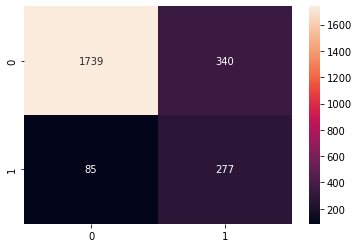

In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = '.0f')

Model naive bayes yang dilatih tidak mengalami overfitting sehingga tidak perlu dilakukan hyperparameter tuning

## Logistic Regression

### Drop Non Linear Features

In [ ]:
non_linear = ['Weekend']
os = [x for x in X_train.columns if 'OperatingSystem' in x]
browser = [x for x in X_train.columns if 'Browser' in x]
region = [x for x in X_train.columns if 'Region' in x]
traffic = [x for x in X_train.columns if 'TrafficType' in x]

non_linear = non_linear + os + browser + region + traffic

### Drop non linear
X_train_lr = X_train.drop(non_linear, axis = 1)
X_test_lr = X_test.drop(non_linear, axis = 1)

### Base Training

In [ ]:
### Import Library
from sklearn.linear_model import LogisticRegression

### Train Model
logreg = LogisticRegression()
logreg.fit(X_train_lr, y_train)

LogisticRegression()

In [ ]:
### Evaluate
eval_classification(logreg, True)

Accuracy (train): 0.86
Accuracy (test): 0.87
Precision (train): 0.9
Precision (test): 0.96
Recall (train): 0.89
Recall (test): 0.89
F1 (train): 0.9
F1 (test): 0.92
AUC (train): 0.89
AUC (test): 0.86
CV AUC (train): 0.89
CV AUC (test): 0.89


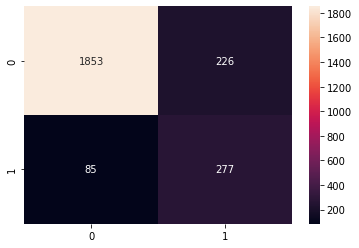

In [ ]:
### Confusion Matrix

y_pred = logreg.predict(X_test_lr)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = '.0f')

Model regresi logistik juga tidak overfitting sehingga tidak perlu dilakukan hyperparameter tuning

## Decision Tree

### Base Training

In [ ]:
### Import Library
from sklearn.tree import DecisionTreeClassifier

### Train Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
### Evaluate
eval_classification(dt)

Accuracy (train): 1.0
Accuracy (test): 0.83
Precision (train): 1.0
Precision (test): 0.91
Recall (train): 1.0
Recall (test): 0.88
F1 (train): 1.0
F1 (test): 0.9
AUC (train): 1.0
AUC (test): 0.7
CV AUC (train): 1.0
CV AUC (test): 0.83


Model decision tree yang dilatih mengalami overfitting sehingga perlu dilakukan hyperparameter tuning

### Hyperparameter Tuning

In [ ]:
# Import Library
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['log2', None] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier()
rs_dt = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='roc_auc',random_state=42)
rs_dt.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(rs_dt)

Accuracy (train): 0.9
Accuracy (test): 0.88
Precision (train): 0.92
Precision (test): 0.93
Recall (train): 0.93
Recall (test): 0.92
F1 (train): 0.92
F1 (test): 0.93
AUC (train): 0.96
AUC (test): 0.88
CV AUC (train): 0.96
CV AUC (test): 0.92


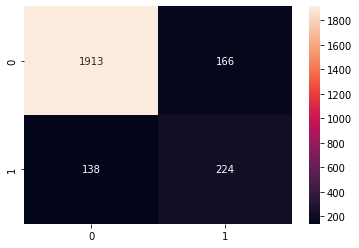

In [ ]:
# Confusion Matrix
y_pred = rs_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.0f')

In [ ]:
# best paramenters

rs_dt.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 110,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 4,
 'min_samples_split': 100,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Setelah dilakukan tuning, model decision tree tidak lagi overfitting dengan parameter terbaik adalah max_depth = 110, criterion = 'entropy', max_features = None, min_samples_leaf = 4, min_samples_split = 100, dan splitter = 'best'

## Random Forest

### Base Training

In [ ]:
### Import Library
from sklearn.ensemble import RandomForestClassifier

### Train model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
### Evaluate
eval_classification(rf)

Accuracy (train): 1.0
Accuracy (test): 0.88
Precision (train): 1.0
Precision (test): 0.94
Recall (train): 1.0
Recall (test): 0.92
F1 (train): 1.0
F1 (test): 0.93
AUC (train): 1.0
AUC (test): 0.89
CV AUC (train): 1.0
CV AUC (test): 0.95


Model random forest yang dilatih masih overfitting sehingga perlu adanya hyperparameter tuning

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(2, 150, 30)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 20)]
min_samples_split = [int(x) for x in np.linspace(2, 150, 30)]
min_samples_leaf = [int(x) for x in np.linspace(2, 150, 30)]

hyperparameters = dict(n_estimators = n_estimators,
                       criterion = criterion,
                       max_depth = max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

rf_tune = RandomForestClassifier(random_state = 42)
rs_rf = RandomizedSearchCV(rf_tune, hyperparameters, cv = 5, scoring = 'roc_auc', 
                           n_iter = 10, random_state = 42)
rs_rf.fit(X_train, y_train)
eval_classification(rs_rf)

Accuracy (train): 0.89
Accuracy (test): 0.87
Precision (train): 0.93
Precision (test): 0.95
Recall (train): 0.9
Recall (test): 0.9
F1 (train): 0.91
F1 (test): 0.92
AUC (train): 0.96
AUC (test): 0.91
CV AUC (train): 0.96
CV AUC (test): 0.94


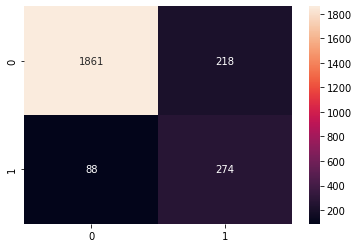

In [ ]:
# Confusion Matrix
y_pred = rs_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.0f')

In [ ]:
### Best Parameters
rs_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 89,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 150,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 104,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Setelah tuning, model random forest mengalami peningkatan performa dan tidak lagi overfitting. Hyperparameter terbaiknya adalah n_estimators = 104, criterion = 'entropy', max_depth = 89, min_samples_split = 150, dan min_samples_leaf = 2.

## K-Nearest Neighbors

### Base Training

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train

KNeighborsClassifier()

In [ ]:
# Evaluasi
eval_classification(knn)

Accuracy (train): 0.91
Accuracy (test): 0.86
Precision (train): 0.94
Precision (test): 0.94
Recall (train): 0.92
Recall (test): 0.89
F1 (train): 0.93
F1 (test): 0.92
AUC (train): 0.97
AUC (test): 0.84
CV AUC (train): 0.97
CV AUC (test): 0.92


Model KNN sedikit mengalami overfitting sehingga perlu hyperparameter tuning

### Hyperparameter Tuning

In [ ]:
n_neighbors = [int(x) for x in np.linspace(2, 100, 30)]
hyperparameters = dict(n_neighbors = n_neighbors)

knn_tune = KNeighborsClassifier()
rs_knn = RandomizedSearchCV(knn_tune, hyperparameters, cv = 5, return_train_score = True,
                            scoring = 'roc_auc', random_state = 42)
rs_knn.fit(X_train, y_train)
eval_classification(rs_knn)

Accuracy (train): 0.87
Accuracy (test): 0.87
Precision (train): 0.9
Precision (test): 0.95
Recall (train): 0.9
Recall (test): 0.9
F1 (train): 0.9
F1 (test): 0.92
AUC (train): 0.93
AUC (test): 0.87
CV AUC (train): 0.93
CV AUC (test): 0.91


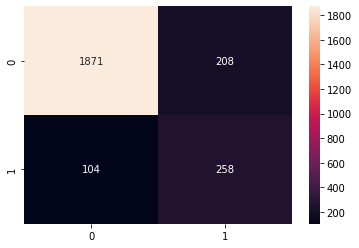

In [ ]:
# Confusion Matrix
y_pred = rs_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.0f')

In [ ]:
### Best Parameters
rs_knn.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 29,
 'p': 2,
 'weights': 'uniform'}

Performa model KNN lebih baik setelah tuning. Hyperparameter terbaiknya adalah n_neighbors = 29

## Support Vector Machine

### Base Training

In [ ]:
from sklearn.svm import SVC # import library
svc = SVC(probability=True) # define model
svc.fit(X_train, y_train) # train model

SVC(probability=True)

In [ ]:
# evaluate
eval_classification(svc)

Accuracy (train): 0.87
Accuracy (test): 0.87
Precision (train): 0.91
Precision (test): 0.96
Recall (train): 0.89
Recall (test): 0.89
F1 (train): 0.9
F1 (test): 0.92
AUC (train): 0.94
AUC (test): 0.87
CV AUC (train): 0.94
CV AUC (test): 0.92


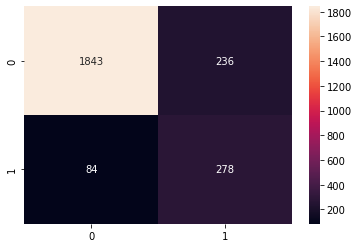

In [ ]:
# Confusion Matrix
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.0f')

Model SVC tidak mengalami overfitting

## Ada Boost

### Base Training

In [ ]:
### Import Library
from sklearn.ensemble import AdaBoostClassifier

### Train Model
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
### Evaluate
eval_classification(ab)

Accuracy (train): 0.88
Accuracy (test): 0.87
Precision (train): 0.92
Precision (test): 0.95
Recall (train): 0.9
Recall (test): 0.89
F1 (train): 0.91
F1 (test): 0.92
AUC (train): 0.93
AUC (test): 0.88
CV AUC (train): 0.93
CV AUC (test): 0.92


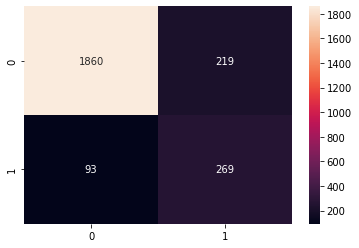

In [ ]:
# Confusion Matrix
y_pred = ab.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.0f')

Model Ada Boost yang dilatih tidak mengalami overfitting

## XG Boost

### Base Training

In [ ]:
# XG boost
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train)


XGBClassifier()

In [ ]:
eval_classification(XGB)

Accuracy (train): 0.9
Accuracy (test): 0.88
Precision (train): 0.93
Precision (test): 0.95
Recall (train): 0.92
Recall (test): 0.91
F1 (train): 0.92
F1 (test): 0.93
AUC (train): 0.95
AUC (test): 0.91
CV AUC (train): 0.95
CV AUC (test): 0.94


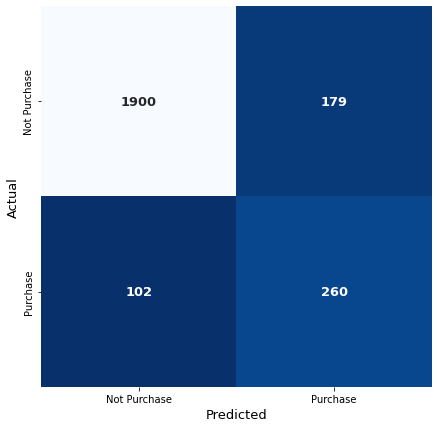

In [ ]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix

y_pred = XGB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (7, 7))

labels = ['Not Purchase', 'Purchase']

sns.heatmap(cm, annot=True, fmt = '.0f', ax = ax, cmap = 'Blues_r',
            xticklabels = labels, yticklabels = labels,
            cbar = False, 
            annot_kws = {
                'fontsize': 13,
                'weight' : 600
            })

plt.xlabel('Predicted', fontsize = 13)
plt.ylabel('Actual', fontsize = 13)

plt.show()

Model XG Boost juga tidak mengalami overfitting

# Final Model

Model yang dipilih pada project ini adalah XGBoost karena memiliki skor AUC yang paling tinggi dan juga mengacu ke skor precision recall.

## Feature Importance

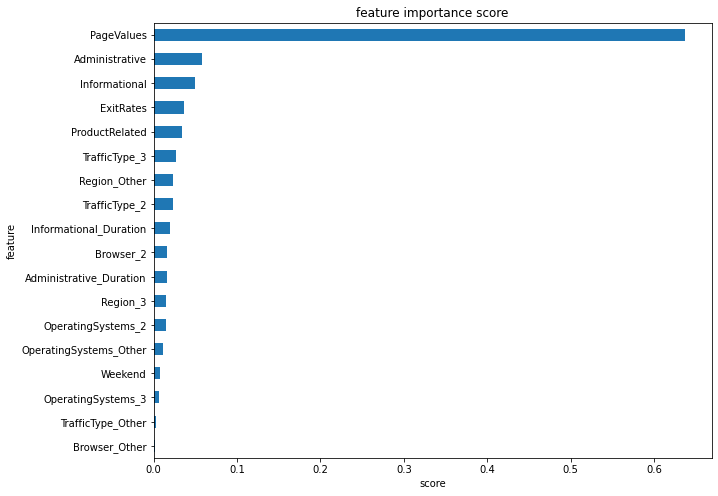

In [ ]:
show_feature_importance(XGB)

### Shap Values

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.9 MB/s eta 0:00:00


In [ ]:
import shap

print('Shap ver:', shap.__version__)

Shap ver: 0.41.0


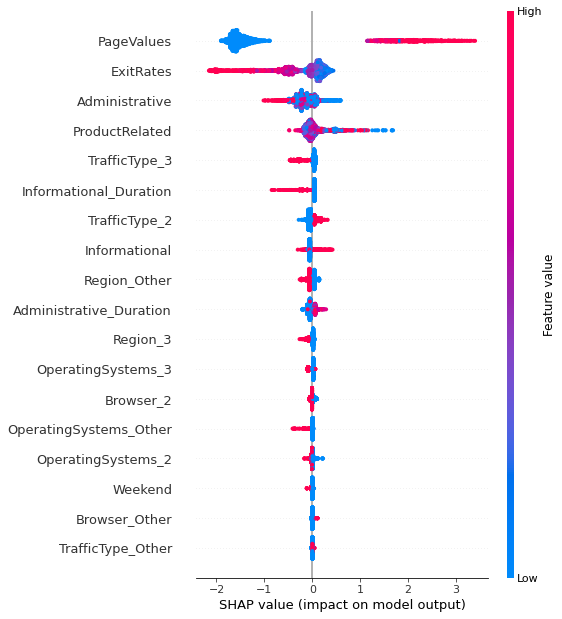

In [ ]:
explainer = shap.TreeExplainer(XGB)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

## Feature yang paling penting

1. PageValues
2. ExitRates
3. Administrative
4. ProductRelated

## Business Insight

1. Jika nilai Page Values semakin tinggi, maka kemungkinan pengunjung untuk purchase juga semakin tinggi.
2. Semakin tinggi exit rate, maka kemungkinan untuk purchase semakin rendah.
3. Semakin sedikit page Administrative yang dikunjungi, maka semakin tinggi kemungkinan pengunjung untuk purchase.
4. Semakin banyak page Product Related yang dikunjungi, maka kemungkinan pengunjung untuk purchase semakin rendah.

## Action Items

1. Untuk sesi dengan page value tinggi namun tidak purchase (abandoned cart), bisa diberikan email remainder untuk melanjutkan transaksi.
2. Lakukan optimasi file gambar dan visual lainnya untuk mempercepat page load time (mengurangi exit rates).
3. Minimalisir transaction error issue dan permudah proses transaksi agar visitor tidak terlalu sering membuka page administrative.
4. Optimasi sistem product recommendation agar sesuai dengan tiap-tiap visitor.